<h1>AUTOMATIC TICKET ASSIGNMENT</h1>
The Real Problem

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. 
IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the
interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. 


Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources.
The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. 
Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing.
On the other hand, manual assignment increases the response and resolution times
which result in user satisfaction deterioration / poor customer service.
Business Domain Value In the support process, incoming incidents are analyzed and assessed by organization’s support teams to


fulfill the request. In many organizations, better allocation and effective usage of the valuable support
resources will directly result in substantial cost savings.
Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring
Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This
team will review the incidents for right ticket categorization, priorities and then carry out initial
diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase
L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from
Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams
by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed
only for incident assignment to L3 teams.

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple
instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are
wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right
functional groups. During this process, some of the incidents are in queue and not addressed timely
resulting in poor customer service.


<h2>Import Liberies</h2>

In [10]:
#pip install langdetect
#pip install contractions

In [9]:
import pandas as pd
import gensim
import string
import contractions
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem.porter import *
from sklearn.utils import *
from collections import Counter
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect

from nltk.stem.porter import *
stemmer = PorterStemmer()

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

<h2>Initialize Data</h2>

In [ ]:
#first rows of dataset
df = pd.read_excel('input_data.xlsx')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
#size of data set
df.shape

(8500, 4)

In [ ]:
#Making copy of dataframe to work on
df_1 = df.copy()
df_1.head(3)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0


In [ ]:
#Checking Number of duplicate entries
df_1[df_1.duplicated() == True]

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\n\n...,bpctwhsn kzqsbmtp,GRP_8
724,blank call,blank call,rbozivdq gmlhrtvp,GRP_0
1064,job Job_1967d failed in job_scheduler at: 10/1...,received from: monitoring_tool@company.com\n\n...,bpctwhsn kzqsbmtp,GRP_8
1125,blank call,blank call,rbozivdq gmlhrtvp,GRP_0
1744,phone issue,phone issue,gzjtweph mnslwfqv,GRP_0
1851,reset passwords for fylrosuk kedgmiul using pa...,the,fylrosuk kedgmiul,GRP_17


**There are total of 84 Duplicate entries in dataset.**

In [ ]:
#Removeing duplicate entries
df_1.drop_duplicates().head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
#Checking Null entries
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**There are Null entries in 'Short description' & 'Description' columns.**

In [ ]:
#Number of NaN values
df_1.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
#Entry having Null value in col 'Description'
df_1[df_1['Description'].isna()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
#Null entry percentage of each column
count = round(df_1.isna().sum(),2)
percent = round((df_1.isna().sum() / df_1.shape[0])*100,2)
data = pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={'index':'Columns',0:'NaN_Entries',1:'Percentage'},inplace=True)
data

,Columns,NaN_Entries,Percentage
0,Short description,8,0.09
1,Description,1,0.01
2,Caller,0,0.00
3,Assignment group,0,0.00


In [ ]:
#Droping those null entry.
df_1.dropna(inplace=True)
df_1.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
#Checking number of Groups in assignment
df_1['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [ ]:
#Frequency of ticket generated in each group
df_1['Assignment group'].value_counts()

GRP_0     3968
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      61
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_62      25
GRP_48      25
GRP_23      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_49       6
GRP_46       6
GRP_59       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_68       3
GRP_63       3
GRP_38       3
GRP_58       3
GRP_56       3
GRP_57       2
GRP_54       2
GRP_69       2
GRP_71    

<h4>Observation:</h4>
<ul>
    <li>We can observe that there is huge differance between ticket generated in each groups</li>
    <li>This has lead to imbalance in dataset</li>
</ul>

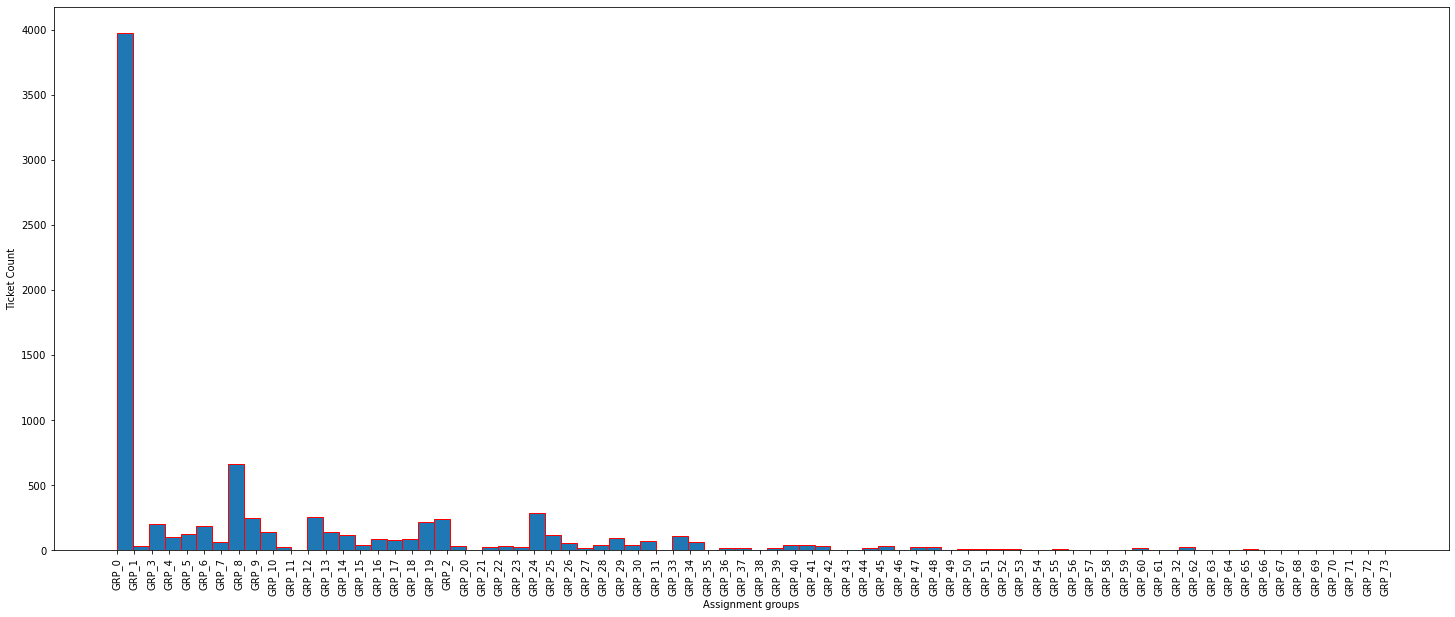

In [ ]:
#Graphical representaion of above insights
plt.figure(figsize=(25,10))
plt.hist(df['Assignment group'],bins=80,edgecolor='red')
plt.xticks(rotation=90)
plt.xlabel('Assignment groups')
plt.ylabel('Ticket Count')
plt.show()

<h2>Data Cleaning</h2>

In [ ]:
df_1['Description'][1]

'\n\nreceived from: hmjdrvpb.komuaywn@gmail.com\n\nhello team,\n\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\n\nkind '

In [ ]:
msg = '\n\nreceived from: hmjdrvpb.komuaywn@gmail.com\n\nhello team,\n\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\n\nkind '

In [ ]:
#defining the function for pre-processing the text.
def text_preprocess(text):
    #converting into string
    text=str(text)
    
    #converting into lower cast
    text = text.lower()
    
    #converting abbervation/shortwords to root words
    text = contractions.fix(text)
    
    #replacing html with blank space
    text = text.replace('{html}',"")
    
    #regurlar expression pattern into pattern object
    cleanr = re.compile('<.*?>')
    
    #replacing pattern object to space
    cleantext = re.sub(cleanr, '', text)
    
    #removing email id
    rem_email = re.sub('\S+@+\S+[.com]','',cleantext)
    
    #removing special charater
    rem_special = re.sub(r'[_"\-;%()|~^+&=*%.,!?:#$@\[\]/]', ' ', rem_email)
    
    #removing URl link
    rem_url=re.sub(r'http\S+', '',rem_special)
    
    #removing 0-9 numbers
    rem_num = re.sub('[0-9]+', '', rem_url)
    
    #raw text into tokens
    tokenizer = RegexpTokenizer(r'\w+')
    
    #creating tokens from text
    tokens = tokenizer.tokenize(rem_num) 
    
    #removing stop words
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    
    #converting inflection words to root words
    stem_words=[stemmer.stem(w) for w in filtered_words]
    
    #grouping together the different inflected forms of a word so they can be analyzed as a single item
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    
    #returning text
    return " ".join(filtered_words)

In [ ]:
#creating new column for preprocessed text data
df_1["Short description_clean"]=df_1["Short description"].apply(text_preprocess).replace("'", "")
df_1["Description_clean"]=df_1["Description"].apply(text_preprocess).replace("'", "")
df_1["Caller_clean"]=df_1["Caller"].apply(text_preprocess)
df_1['Short description_clean'].head(),df_1['Description_clean'].head()

(0                login issue
 1                    outlook
 2             cannot log vpn
 3    unable access tool page
 4                skype error
 Name: Short description_clean, dtype: object,
 0    verified user details employee manager name ch...
 1    received hello team meetings skype meetings et...
 2                         received cannot log vpn best
 3                              unable access tool page
 4                                          skype error
 Name: Description_clean, dtype: object)

In [ ]:
#head of dataframe
df_1.head()

,Short description,Description,Caller,Assignment group,Short description_clean,Description_clean,Caller_clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook,received hello team meetings skype meetings et...,hmjdrvpb komuaywn
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cannot log vpn,received cannot log vpn best,eylqgodm ybqkwiam
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable access tool page,unable access tool page,xbkucsvz gcpydteq
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,owlgqjme qhcozdfx


In [ ]:
#droping the unnecessary columns
df_1.drop(['Short description','Description','Caller'],axis=1,inplace=True)

In [ ]:
#head of dataframe after droping columns
df_1.head()

,Assignment group,Short description_clean,Description_clean,Caller_clean
0,GRP_0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds
1,GRP_0,outlook,received hello team meetings skype meetings et...,hmjdrvpb komuaywn
2,GRP_0,cannot log vpn,received cannot log vpn best,eylqgodm ybqkwiam
3,GRP_0,unable access tool page,unable access tool page,xbkucsvz gcpydteq
4,GRP_0,skype error,skype error,owlgqjme qhcozdfx


In [ ]:
#New Dataframe for checking tickets per group
df_2= df_1.groupby('Assignment group')['Description_clean'].count().reset_index()
df_2.head()

,Assignment group,Description_clean
0,GRP_0,3968
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257


In [ ]:
#groups with most tickets
df_2 = df_2.sort_values('Description_clean',ascending=False)
df_2.head(10)

,Assignment group,Description_clean
0,GRP_0,3968
72,GRP_8,661
17,GRP_24,289
4,GRP_12,257
73,GRP_9,252
12,GRP_2,241
11,GRP_19,215
23,GRP_3,200
56,GRP_6,184
5,GRP_13,145


In [ ]:
#list of Assignment grp with less then 15 tickets
df_grp = df_2[df_2['Description_clean']<15]
print('Number of Assignment group less then 15:=>',df_grp.shape[0])
df_grp

Number of Assignment group less then 15:=> 28


,Assignment group,Description_clean
46,GRP_50,14
49,GRP_53,11
62,GRP_65,11
48,GRP_52,9
47,GRP_51,8
51,GRP_55,8
44,GRP_49,6
55,GRP_59,6
41,GRP_46,6
38,GRP_43,5


In [ ]:
#list of groups having less then 15 tickets
df_grp['Assignment group'].unique()

array(['GRP_50', 'GRP_53', 'GRP_65', 'GRP_52', 'GRP_51', 'GRP_55',
       'GRP_49', 'GRP_59', 'GRP_46', 'GRP_43', 'GRP_66', 'GRP_32',
       'GRP_38', 'GRP_68', 'GRP_63', 'GRP_58', 'GRP_56', 'GRP_57',
       'GRP_69', 'GRP_71', 'GRP_72', 'GRP_54', 'GRP_64', 'GRP_61',
       'GRP_67', 'GRP_35', 'GRP_70', 'GRP_73'], dtype=object)

In [ ]:
#Making copy dataframe
df_4=df_1.copy()

In [ ]:
#Final data by eliminating the groups not containing more tickets.
df_4= df_4[~df_4['Assignment group'].isin(['GRP_50','GRP_53','GRP_65','GRP_52','GRP_51','GRP_55','GRP_49','GRP_59','GRP_46','GRP_43','GRP_32','GRP_66','GRP_38','GRP_68','GRP_63','GRP_58','GRP_56','GRP_57','GRP_69','GRP_71','GRP_72','GRP_54','GRP_64','GRP_61','GRP_67','GRP_35','GRP_70' ,'GRP_73'])]
df_4

,Assignment group,Short description_clean,Description_clean,Caller_clean
0,GRP_0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds
1,GRP_0,outlook,received hello team meetings skype meetings et...,hmjdrvpb komuaywn
2,GRP_0,cannot log vpn,received cannot log vpn best,eylqgodm ybqkwiam
3,GRP_0,unable access tool page,unable access tool page,xbkucsvz gcpydteq
4,GRP_0,skype error,skype error,owlgqjme qhcozdfx
...,...,...,...,...
8494,GRP_3,tablet needs reimaged due multiple issues crm ...,tablet needs reimaged due multiple issues crm ...,cpmaidhj elbaqmtp
8495,GRP_29,emails coming mail,received good afternoon receiving emails sent ...,avglmrts vhqmtiua
8496,GRP_0,telephony software issue,telephony software issue,rbozivdq gmlhrtvp
8497,GRP_0,vip windows password reset tifpdchb pedxruyf,vip windows password reset tifpdchb pedxruyf,oybwdsgx oxyhwrfz


In [ ]:
#caller_clean seems not to be infomative,Let's drop caller column.
df_4.drop('Caller_clean',axis=1,inplace=True)

In [ ]:
df_4['Ticket'] = df_4['Short description_clean'] + ' ' + df_4['Description_clean']

In [ ]:
df_4.head()

,Assignment group,Short description_clean,Description_clean,Ticket
0,GRP_0,login issue,verified user details employee manager name ch...,login issue verified user details employee man...
1,GRP_0,outlook,received hello team meetings skype meetings et...,outlook received hello team meetings skype mee...
2,GRP_0,cannot log vpn,received cannot log vpn best,cannot log vpn received cannot log vpn best
3,GRP_0,unable access tool page,unable access tool page,unable access tool page unable access tool page
4,GRP_0,skype error,skype error,skype error skype error


In [ ]:
df_4['Ticket'][0]

'login issue verified user details employee manager name checked user name reset password advised user login check caller confirmed able login issue resolved'

In [ ]:
#detecting languages
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'
df_4['Language_Identification']= df_4['Description_clean'].apply(detect_my)

In [ ]:
#total number of language detected
df_4.Language_Identification.unique()

array(['en', 'no', 'ca', 'fr', 'sv', 'af', 'es', 'it', 'sl', 'nl', 'da',
       'pt', 'tl', 'id', 'de', 'et', 'cy', 'ro', 'fi', 'pl', 'sq',
       'unknown', 'hr', 'sk', 'lt', 'lv', 'sw', 'so', 'cs', 'tr', 'vi',
       'hu'], dtype=object)

In [ ]:
#value count of each language
df_4.Language_Identification.value_counts()

en         5889
de          398
fr          369
af          346
sl          244
sv          153
da          144
it          129
no          125
ca          106
nl          101
unknown      67
es           61
ro           45
pl           30
et           24
pt           22
cy           18
sq           14
tl           14
hr           12
fi           11
sk           11
lt           10
so            7
id            6
cs            6
lv            2
sw            1
tr            1
vi            1
hu            1
Name: Language_Identification, dtype: int64

/Users/c100-110/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


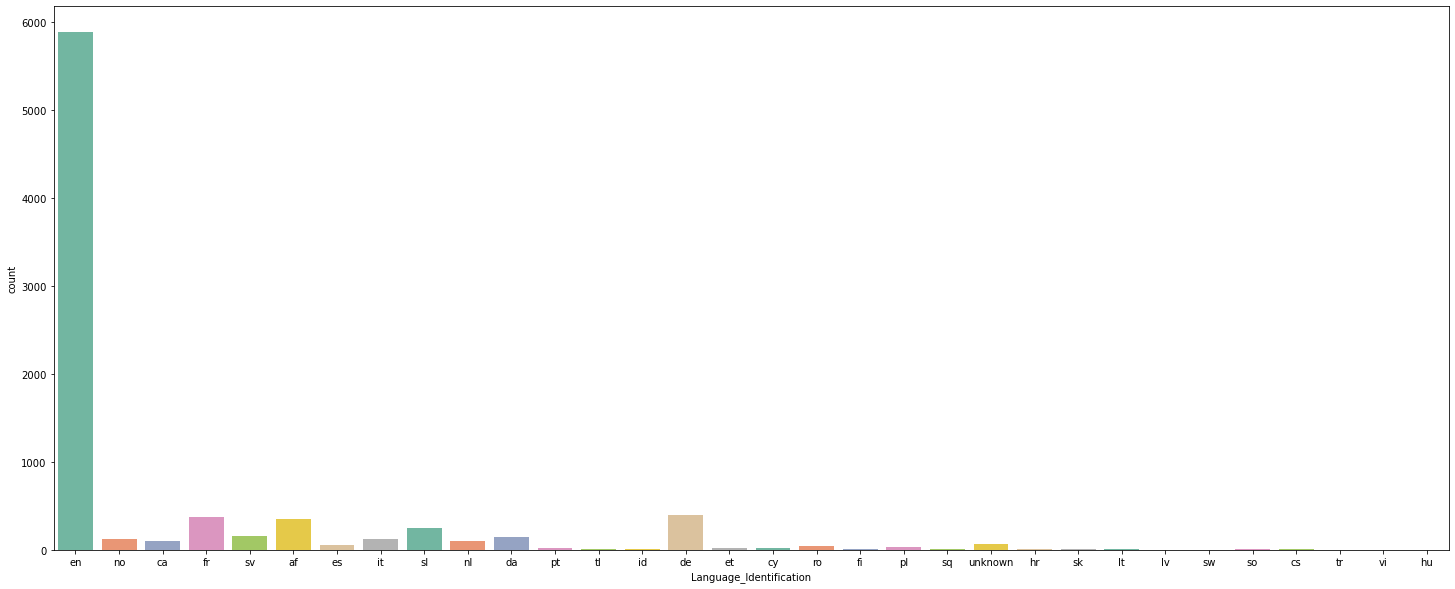

In [ ]:
#graphical representation of language detected
plt.figure(figsize=(25,10))
sns.countplot(df_4.Language_Identification,palette='Set2')
plt.show()

In [ ]:
#number of tickets in english
final_df = df_4[df_4['Language_Identification'].isin(['en'])]
final_df

,Assignment group,Short description_clean,Description_clean,Ticket,Language_Identification
0,GRP_0,login issue,verified user details employee manager name ch...,login issue verified user details employee man...,en
1,GRP_0,outlook,received hello team meetings skype meetings et...,outlook received hello team meetings skype mee...,en
2,GRP_0,cannot log vpn,received cannot log vpn best,cannot log vpn received cannot log vpn best,en
3,GRP_0,unable access tool page,unable access tool page,unable access tool page unable access tool page,en
7,GRP_0,ticket employment status new non employee ente...,ticket employment status new non employee ente...,ticket employment status new non employee ente...,en
...,...,...,...,...,...
8494,GRP_3,tablet needs reimaged due multiple issues crm ...,tablet needs reimaged due multiple issues crm ...,tablet needs reimaged due multiple issues crm ...,en
8495,GRP_29,emails coming mail,received good afternoon receiving emails sent ...,emails coming mail received good afternoon rec...,en
8496,GRP_0,telephony software issue,telephony software issue,telephony software issue telephony software issue,en
8497,GRP_0,vip windows password reset tifpdchb pedxruyf,vip windows password reset tifpdchb pedxruyf,vip windows password reset tifpdchb pedxruyf v...,en


In [ ]:
Word_freq = pd.DataFrame(Counter(' '.join(final_df['Ticket']).split()).most_common(45), columns=['Words','Frequency'])
#Word_freq[Word_freq['Frequency'] < 500]

In [ ]:
#Words having more then 500 frequency.
Word_freq

,Words,Frequency
0,job,3416
1,please,2044
2,yes,2022
3,received,1961
4,password,1598
5,erp,1515
6,company,1443
7,tool,1389
8,scheduler,1384
9,user,1353


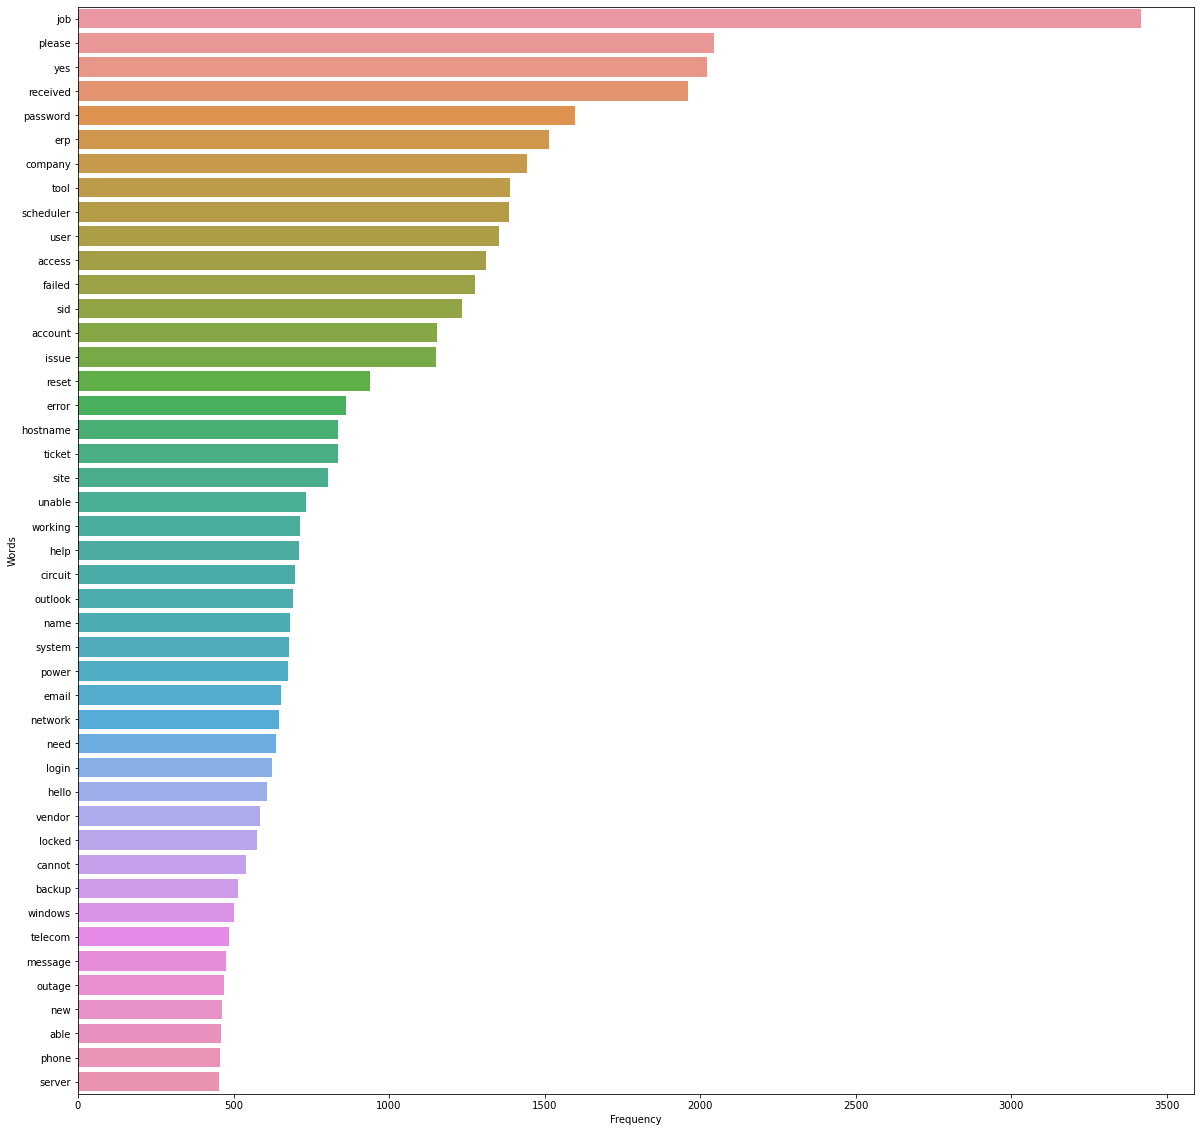

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(data=Word_freq,y='Words',x='Frequency')
plt.show()

<h2>Data Balancing</h2>

In [ ]:
#Creating dataframe of only english language of columns Assignment grp and Ticket
df_4 = final_df[final_df['Assignment group'].isin(['GRP_0'])]
df_4.drop(['Short description_clean','Description_clean','Language_Identification'],axis=1,inplace=True)
df_4

/Users/c100-110/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Assignment group,Ticket
0,GRP_0,login issue verified user details employee man...
1,GRP_0,outlook received hello team meetings skype mee...
2,GRP_0,cannot log vpn received cannot log vpn best
3,GRP_0,unable access tool page unable access tool page
7,GRP_0,ticket employment status new non employee ente...
...,...,...
8488,GRP_0,erp account unlock name mfeyouli ndobtzpw lang...
8489,GRP_0,account locked account locked
8492,GRP_0,tool etime option visitble tool etime option v...
8496,GRP_0,telephony software issue telephony software issue


In [ ]:
df_4.head()

,Assignment group,Ticket
0,GRP_0,login issue verified user details employee man...
1,GRP_0,outlook received hello team meetings skype mee...
2,GRP_0,cannot log vpn received cannot log vpn best
3,GRP_0,unable access tool page unable access tool page
7,GRP_0,ticket employment status new non employee ente...


In [ ]:
#Removing 'GRP_0' from the assignment group.
df_5= final_df[~final_df['Assignment group'].isin(['GRP_0'])]
df_5.drop(['Short description_clean','Description_clean','Language_Identification'],axis=1,inplace=True)
df_5.head(5)

/Users/c100-110/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Assignment group,Ticket
17,GRP_3,undocking screen come back undocking screen co...
32,GRP_4,duplication network address received gentles t...
43,GRP_5,please reroute jobs printer printer issue need...
49,GRP_7,status change telephony software closing call ...
50,GRP_8,job zscr dly merktc failed job scheduler recei...


In [ ]:
#Creating Dataframe for Others catageroy Asssignments.
Other_df = df_5.copy()
Other_df['Assignment group'] = 'Other_grps'

In [ ]:
#Sum of all others grps except the "GRP_0"
Other_df['Assignment group'].value_counts()

Other_grps    3238
Name: Assignment group, dtype: int64

In [ ]:
#creating frame for "GRP_0" and all others grps
frame = [df_4, Other_df]

In [ ]:
#Concatenating the 2 data frames
pd.set_option('display.max_rows', 2000)
dff=pd.concat(frame)
dff['Assignment group'].value_counts()

Other_grps    3238
GRP_0         2651
Name: Assignment group, dtype: int64

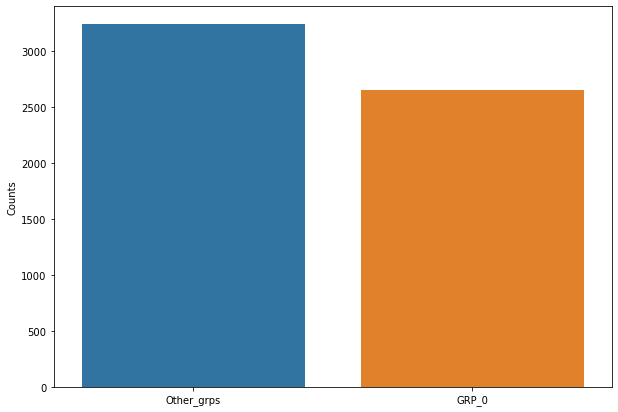

In [ ]:
#Graphical representation of 'GRP_0' and all other group
plt.figure(figsize=(10,7))
result=dff['Assignment group'].value_counts()
sns.barplot(x = result.index, y = result.values,)
plt.ylabel('Counts')
plt.show()

**Above graph shows the imblance in data.'Resampling is done to balance data.'**

In [ ]:
#taking fix number of tickets
maxOthers = df_5['Assignment group'].value_counts().max()
maxOthers

544

In [ ]:
#Resampling Imbalance data
df_cols = df_5[0:0]

for grp in df_5['Assignment group'].unique():
    itTicketGrpDF = df_5[df_5['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    df_cols = df_cols.append(resampled)

OtherGrps_resampled = pd.concat([itTicketGrpDF,df_cols])
OtherGrps_resampled.reset_index(inplace=True)


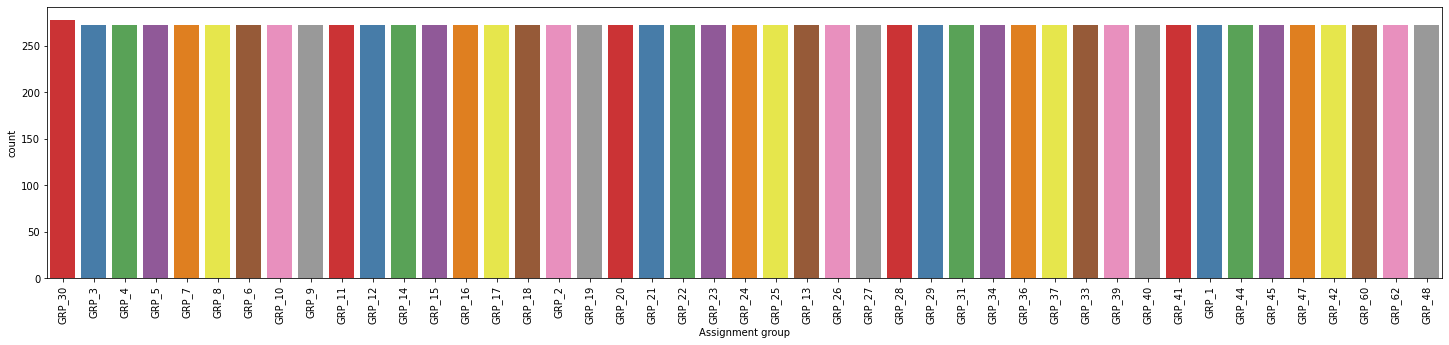

In [ ]:
#Graphical Representation of balance data
plt.figure(figsize=(25,5))
sns.countplot(x='Assignment group',data=OtherGrps_resampled,palette="Set1")
plt.xticks(rotation=90)
plt.show()

In [ ]:
OtherGrps_resampled = OtherGrps_resampled.set_index('index')

In [ ]:
df_2=df_4.append(OtherGrps_resampled)
df_2.head(5)

,Assignment group,Ticket
0,GRP_0,login issue verified user details employee man...
1,GRP_0,outlook received hello team meetings skype mee...
2,GRP_0,cannot log vpn received cannot log vpn best
3,GRP_0,unable access tool page unable access tool page
7,GRP_0,ticket employment status new non employee ente...


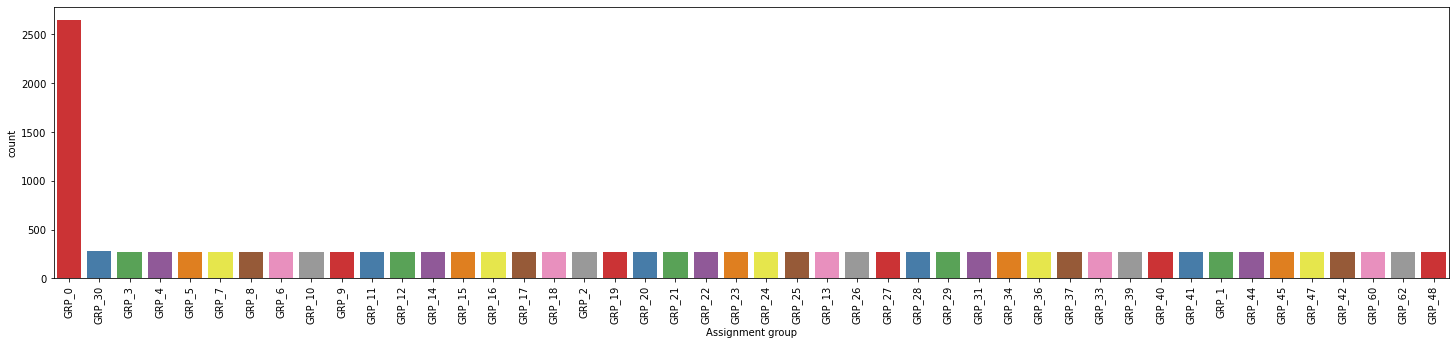

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(x='Assignment group',data=df_2,palette="Set1")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df_2['Assignment group']= label_encoder.fit_transform(df_2['Assignment group']) 

df_2['Assignment group'].unique()

array([ 0, 24, 23, 31, 39, 43, 44, 40,  2, 45,  3,  4,  6,  7,  8,  9, 10,
       12, 11, 13, 14, 15, 16, 17, 18,  5, 19, 20, 21, 22, 25, 27, 28, 29,
       26, 30, 32, 33,  1, 35, 36, 37, 34, 41, 42, 38])

In [ ]:
df_3 = df_2

In [ ]:
#Combining the data by resetting the index
df_2=df_2.sort_index(axis = 0)
df_3=df_2.reset_index()
df_3=df_3.drop(['index'],axis=1)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_3.head()

,Assignment group,Ticket
0,0,login issue verified user details employee man...
1,0,outlook received hello team meetings skype mee...
2,0,cannot log vpn received cannot log vpn best
3,0,unable access tool page unable access tool page
4,0,ticket employment status new non employee ente...


<h3>Vectorization</h3>

In [ ]:
#converting words into tokens(Bag of words)
from sklearn.feature_extraction.text import CountVectorizer
bow_transform = CountVectorizer().fit(df_3['Ticket'])

In [ ]:
#length
print(len(bow_transform.vocabulary_))

10500


In [ ]:
#list of tokens(words)
bow_transform.vocabulary_

{'login': 5154,
 'issue': 4410,
 'verified': 9492,
 'user': 9374,
 'details': 2150,
 'employee': 2729,
 'manager': 5333,
 'name': 5793,
 'checked': 1348,
 'reset': 7477,
 'password': 6393,
 'advised': 172,
 'check': 1347,
 'caller': 1169,
 'confirmed': 1609,
 'able': 28,
 'resolved': 7488,
 'outlook': 6264,
 'received': 7242,
 'hello': 3863,
 'team': 8737,
 'meetings': 5473,
 'skype': 8183,
 'etc': 2879,
 'appearing': 441,
 'calendar': 1163,
 'somebody': 8267,
 'please': 6596,
 'advise': 171,
 'correct': 1730,
 'kind': 4748,
 'cannot': 1193,
 'log': 5146,
 'vpn': 9617,
 'best': 887,
 'unable': 9229,
 'access': 54,
 'tool': 8979,
 'page': 6325,
 'ticket': 8898,
 'employment': 2731,
 'status': 8430,
 'new': 5873,
 'non': 5942,
 'enter': 2784,
 'engineering': 2770,
 'says': 7832,
 'connected': 1623,
 'submit': 8516,
 'reports': 7430,
 'site': 8159,
 'loading': 5124,
 'correctly': 1735,
 'sgxqsuojr': 8028,
 'xwbesorf': 10133,
 'cards': 1207,
 'company': 1535,
 'website': 9786,
 'trying': 9

In [ ]:
#transformering text
messages_bow = bow_transform.transform(df_3['Ticket'])

In [ ]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (14897, 10500)
Amount of Non-Zero occurences:  328896


In [ ]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


<h3>TF-IDf Transformer</h3>

In [ ]:
#applying tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
#transforming the words
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(14897, 10500)


<h3>Training Model</h3>

In [ ]:
#Traing the model
Ticket_model = RandomForestClassifier().fit(messages_tfidf,df_3['Assignment group'])

<h3>Model Evulation</h3>

In [ ]:
#Predicting the train data
all_predictions = Ticket_model.predict(messages_tfidf)
print(all_predictions)

[ 0  0  0 ... 42 42 42]


In [ ]:
#model evulation
from sklearn.metrics import classification_report
print (classification_report(df_3['Assignment group'], all_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2651
           1       0.90      1.00      0.95       272
           2       1.00      0.92      0.95       272
           3       1.00      1.00      1.00       272
           4       1.00      0.95      0.97       272
           5       1.00      0.98      0.99       272
           6       1.00      0.99      0.99       272
           7       1.00      1.00      1.00       272
           8       1.00      1.00      1.00       272
           9       1.00      1.00      1.00       272
          10       1.00      1.00      1.00       272
          11       1.00      1.00      1.00       272
          12       0.99      0.98      0.99       272
          13       1.00      1.00      1.00       272
          14       1.00      1.00      1.00       272
          15       1.00      1.00      1.00       272
          16       1.00      1.00      1.00       272
          17       1.00    

<h3>Train/Test Split</h3>

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_3['Ticket'],df_3['Assignment group'],test_size=0.30,random_state=46)

<h3>Creating data Pipeline</h3>

In [ ]:
#creating pipeline for model
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
#training model
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
#prediction
y_predict = pipeline.predict(X_test)

In [ ]:
#Accuracy of model
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       917
           1       1.00      0.91      0.95        90
           2       0.77      0.96      0.86        77
           3       1.00      1.00      1.00        87
           4       0.82      0.88      0.85        68
           5       0.88      0.81      0.84        80
           6       0.93      0.97      0.95        76
           7       1.00      1.00      1.00        76
           8       0.96      0.96      0.96        84
           9       1.00      0.99      0.99        79
          10       0.90      0.99      0.94        73
          11       0.70      0.96      0.81        56
          12       0.67      0.96      0.79        57
          13       1.00      0.99      0.99        77
          14       1.00      1.00      1.00        89
          15       1.00      1.00      1.00        80
          16       1.00      0.99      0.99        85
          17       1.00    

<h2>FINESH</h2>---------------